<a href="https://colab.research.google.com/github/AdityaKiran0428/fruit-vegetable-recognition-system/blob/main/Training_fruit_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Data Preprocessing

##Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/CS23B002/Sem3/SE/Fruit_Vegetables_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/CS23B002/Sem3/SE/Fruit_Vegetables_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn = tf.keras.models.Sequential()

# Define the input shape with the Input layer first
cnn.add(tf.keras.layers.Input(shape=[64, 64, 3]))

# Add Conv2D layer without specifying input_shape
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add MaxPooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

##Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.0295 - loss: 34.4546 - val_accuracy: 0.0997 - val_loss: 3.4682
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0582 - loss: 5.1095 - val_accuracy: 0.1567 - val_loss: 3.3597
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0862 - loss: 3.8306 - val_accuracy: 0.2023 - val_loss: 3.2624
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1252 - loss: 4.0743 - val_accuracy: 0.3219 - val_loss: 2.8562
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.1566 - loss: 3.9209 - val_accuracy: 0.4416 - val_loss: 2.5226
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2275 - loss: 3.0552 - val_accuracy: 0.4387 - val_loss: 2.4212
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2499 - loss: 3.2309 - val_accuracy: 0.4644 - val_loss: 2.0961
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.3090 - loss: 2.9677 - val_accuracy: 0.2821 - 

##Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return dictionary of history

{'accuracy': [0.034349918365478516,
  0.06131621077656746,
  0.10272873193025589,
  0.13611556589603424,
  0.1666131615638733,
  0.22632423043251038,
  0.27383628487586975,
  0.32487961649894714,
  0.3813804090023041,
  0.420545756816864,
  0.4629213511943817,
  0.5020866990089417,
  0.5617977380752563,
  0.5656501054763794,
  0.6022471785545349,
  0.6182985305786133,
  0.6260032057762146,
  0.679614782333374,
  0.6863563656806946,
  0.7191011309623718,
  0.7351524829864502,
  0.7489566802978516,
  0.7627608180046082,
  0.7881219983100891,
  0.7971107363700867,
  0.7791332006454468,
  0.8250401020050049,
  0.8231139779090881,
  0.8038523197174072,
  0.8221508860588074],
 'loss': [11.383219718933105,
  4.593145370483398,
  3.791491746902466,
  3.8954808712005615,
  3.8112194538116455,
  3.088104486465454,
  3.3844661712646484,
  2.906534433364868,
  2.665083885192871,
  2.5753190517425537,
  2.3440120220184326,
  2.0865421295166016,
  1.9560669660568237,
  2.0160861015319824,
  1.702823

In [ ]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating accuracy of Model achieved on Validation set

In [ ]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 90.02848863601685 %


#Accuracy Visualisation

##Training Visualisation

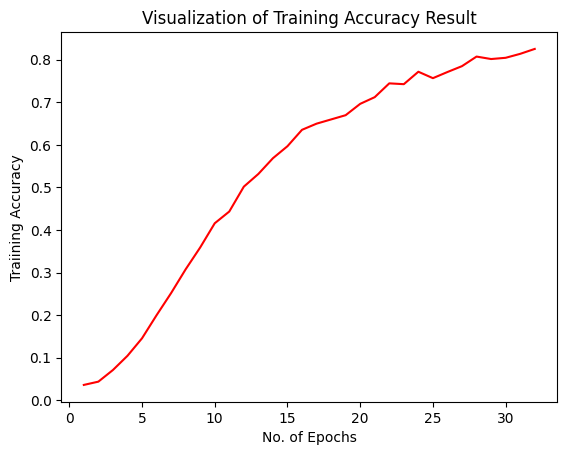

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Visualisation

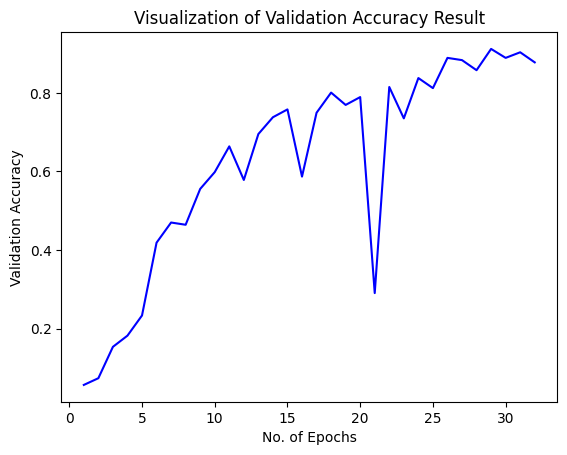

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()